In [244]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

imdb

In [245]:
df_imdb = pd.read_csv('imdb.title.basics.csv.gz')
df_imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [246]:
df_imdb_drop = df_imdb.drop(['tconst','original_title','start_year','runtime_minutes'], axis=1)

In [247]:
df_imdb_drop.head()

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [248]:
df_imdb_drop = df_imdb_drop.drop_duplicates(subset=None, keep='first')
df_imdb_drop.head()

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [249]:
df_imdb_drop_rename= df_imdb_drop.rename(columns = {"primary_title": "movie"})
df_imdb_drop_rename.head()

,movie,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [250]:
df_imdb_drop.isna().sum()

primary_title       0
genres           5355
dtype: int64

tn

In [251]:
df_tn = pd.read_csv('tn.movie_budgets.csv.gz')
df_tn.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [252]:
df_tn_drop=df_tn.drop(['id','domestic_gross'], axis=1)
df_tn_drop.head()

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


In [253]:
df_tn_drop['release_date'] =  pd.to_datetime(df_tn_drop['release_date'], infer_datetime_format=True)

In [254]:
df_tn_drop.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,"$425,000,000","$2,776,345,279"
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,2019-06-07,Dark Phoenix,"$350,000,000","$149,762,350"
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


In [261]:
#delete of money signs in df_tn "production_budget."
df_tn_drop['production_budget'] = df_tn_drop['production_budget'].str.replace('$', '')
df_tn_drop

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,"2,776,345,279"
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"1,045,663,875"
2,2019-06-07,Dark Phoenix,350000000,"149,762,350"
3,2015-05-01,Avengers: Age of Ultron,330600000,"1,403,013,963"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"1,316,721,747"
...,...,...,...,...
5777,2018-12-31,Red 11,7000,0
5778,1999-04-02,Following,6000,"240,495"
5779,2005-07-13,Return to the Land of Wonders,5000,"1,338"
5780,2015-09-29,A Plague So Pleasant,1400,0


In [262]:
#delete commas in df_tn "production_budget."
df_tn_drop['production_budget'] = df_tn_drop['production_budget'].str.replace(',', '')
df_tn_drop.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,"2,776,345,279"
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"1,045,663,875"
2,2019-06-07,Dark Phoenix,350000000,"149,762,350"
3,2015-05-01,Avengers: Age of Ultron,330600000,"1,403,013,963"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"1,316,721,747"


In [263]:
#convert from str to int.
df_tn_drop['production_budget'] = df_tn_drop['production_budget'].astype(int)
df_tn_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
worldwide_gross      5782 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 180.8+ KB


In [264]:
df_tn_drop['worldwide_gross'] =df_tn_drop['worldwide_gross'].str.replace('$', '')
df_tn_drop

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,"2,776,345,279"
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"1,045,663,875"
2,2019-06-07,Dark Phoenix,350000000,"149,762,350"
3,2015-05-01,Avengers: Age of Ultron,330600000,"1,403,013,963"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"1,316,721,747"
...,...,...,...,...
5777,2018-12-31,Red 11,7000,0
5778,1999-04-02,Following,6000,"240,495"
5779,2005-07-13,Return to the Land of Wonders,5000,"1,338"
5780,2015-09-29,A Plague So Pleasant,1400,0


In [265]:
#delete comma"
df_tn_drop['worldwide_gross'] = df_tn_drop['worldwide_gross'].str.replace(',', '')
df_tn_drop

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5777,2018-12-31,Red 11,7000,0
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338
5780,2015-09-29,A Plague So Pleasant,1400,0


In [266]:
#convert  from str to int.
df_tn_drop['worldwide_gross'] = df_tn_drop['worldwide_gross'].astype(int)
df_tn_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 180.8+ KB


In [267]:
df_tn_drop['movie'] = df_tn_drop['movie'].str.lower()
df_tn_drop.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875
2,2019-06-07,dark phoenix,350000000,149762350
3,2015-05-01,avengers: age of ultron,330600000,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747


In [268]:
df_tn_drop = df_tn_drop.drop_duplicates(subset=None, keep='first')
df_tn_drop.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875
2,2019-06-07,dark phoenix,350000000,149762350
3,2015-05-01,avengers: age of ultron,330600000,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747


In [269]:
df_tn_drop.isna().sum()

release_date         0
movie                0
production_budget    0
worldwide_gross      0
dtype: int64

tmdb

In [270]:
# data 2

In [271]:
df_tmdb = pd.read_csv('tmdb.movies.csv.gz')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [272]:
df_tmdb_drop = tm.drop(['Unnamed: 0','genre_ids','id','original_language','original_title','popularity','vote_average','vote_count'], axis=1)

In [273]:
df_tmdb_drop.head()

,release_date,title
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [274]:
df_tmdb_drop_rename= df_tmdb_drop.rename(columns = {"title": "movie"})
df_tmdb_drop_rename.head()

,release_date,movie
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [275]:
df_tmdb_drop_rename = df_tmdb_drop_rename.drop_duplicates(subset=None, keep='first')
df_tmdb_drop_rename.head()

,release_date,movie
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [276]:
df_tmdb_drop.isna().sum()

release_date    0
title           0
dtype: int64

Step2 merging

In [277]:
df_tmdb_drop_rename['movie'] = df_tmdb_drop_rename['movie'].str.lower()
df_tn_drop['movie'] = df_tn_drop['movie'].str.lower()
df_imdb_drop_rename['movie'] = df_imdb_drop_rename['movie'].str.lower()
df_imdb_drop_rename['genres'] = df_imdb_drop_rename['genres'].str.lower()
df_imdb_drop_rename.head()
df_tmdb_drop_rename.head()
df_tn_drop.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875
2,2019-06-07,dark phoenix,350000000,149762350
3,2015-05-01,avengers: age of ultron,330600000,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747


step 3 mergeing

In [278]:
df_merged = df_tmdb_drop_rename.merge(df_tn_drop, on='movie').merge(df_imdb_drop_rename, on='movie')
df_merged.head()

,release_date_x,movie,release_date_y,production_budget,worldwide_gross,genres
0,2010-03-26,how to train your dragon,2010-03-26,165000000,494870992,"action,adventure,animation"
1,2010-05-07,iron man 2,2010-05-07,170000000,621156389,"action,adventure,sci-fi"
2,2010-07-16,inception,2010-07-16,160000000,835524642,"action,adventure,sci-fi"
3,2010-02-11,percy jackson & the olympians: the lightning t...,2010-02-12,95000000,223050874,"adventure,family,fantasy"
4,2009-12-18,avatar,2009-12-18,425000000,2776345279,horror


step 5

In [279]:
df_merged = df_merged.sort_values(by='movie', ascending=True)
df_merged.head()

,release_date_x,movie,release_date_y,production_budget,worldwide_gross,genres
3029,2015-11-20,#horror,2015-11-20,1500000,0,"crime,drama,horror"
3236,2016-03-11,10 cloverfield lane,2016-03-11,5000000,108286422,"drama,horror,mystery"
3152,2015-11-20,10 days in a madhouse,2015-11-11,12000000,14616,drama
3819,2018-01-19,12 strong,2018-01-19,35000000,71118378,"action,drama,history"
1926,2013-10-30,12 years a slave,2013-10-18,20000000,181025343,"biography,drama,history"


step 7

In [280]:
#run groupby and take only the first instance of each movie group
df_gp_movie = df_merged.groupby('movie')
df_gp_movie.first()
#reassign back to a dataframe object
df_merged_movie = df_gp_movie.first()
df_merged_movie

,release_date_x,release_date_y,production_budget,worldwide_gross,genres
movie,,,,,
#horror,2015-11-20,2015-11-20,1500000,0,"crime,drama,horror"
10 cloverfield lane,2016-03-11,2016-03-11,5000000,108286422,"drama,horror,mystery"
10 days in a madhouse,2015-11-20,2015-11-11,12000000,14616,drama
12 strong,2018-01-19,2018-01-19,35000000,71118378,"action,drama,history"
12 years a slave,2013-10-30,2013-10-18,20000000,181025343,"biography,drama,history"
...,...,...,...,...,...
zipper,2015-08-28,2015-08-28,4500000,0,"drama,thriller"
zookeeper,2011-07-08,2011-07-08,80000000,170805525,"comedy,family,romance"
zoolander 2,2016-02-12,2016-02-12,50000000,55348693,comedy


In [284]:
#interested in movie release by month - create new column named "release_month"
df_merged_movie['release_month'] = pd.DatetimeIndex(df_merged_movie['release_date_x']).month
df_merged_movie.head()

,release_date_x,release_date_y,production_budget,worldwide_gross,genres,release_month
movie,,,,,,
#horror,2015-11-20,2015-11-20,1500000,0,"crime,drama,horror",11
10 cloverfield lane,2016-03-11,2016-03-11,5000000,108286422,"drama,horror,mystery",3
10 days in a madhouse,2015-11-20,2015-11-11,12000000,14616,drama,11
12 strong,2018-01-19,2018-01-19,35000000,71118378,"action,drama,history",1
12 years a slave,2013-10-30,2013-10-18,20000000,181025343,"biography,drama,history",10


In [286]:
df_merged_movie['profit'] = df_merged_movie['worldwide_gross'] -df_merged_movie['production_budget']
df_merged_movie['profit'] = df_merged_movie['profit'].astype(int)
df_merged_movie.head()

,release_date_x,release_date_y,production_budget,worldwide_gross,genres,release_month,profit
movie,,,,,,,
#horror,2015-11-20,2015-11-20,1500000,0,"crime,drama,horror",11,-1500000
10 cloverfield lane,2016-03-11,2016-03-11,5000000,108286422,"drama,horror,mystery",3,103286422
10 days in a madhouse,2015-11-20,2015-11-11,12000000,14616,drama,11,-11985384
12 strong,2018-01-19,2018-01-19,35000000,71118378,"action,drama,history",1,36118378
12 years a slave,2013-10-30,2013-10-18,20000000,181025343,"biography,drama,history",10,161025343


Text(0, 0.5, 'profit')

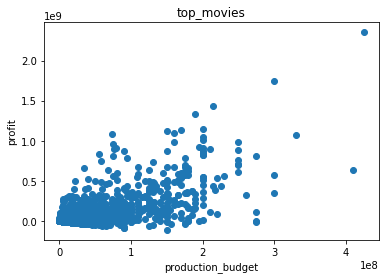

In [288]:
fig, ax = plt.subplots()

ax.scatter(df_merged_movie['production_budget'],df_merged_movie['profit'])
ax.set_title('top_movies')
ax.set_xlabel('production_budget')
ax.set_ylabel('profit')

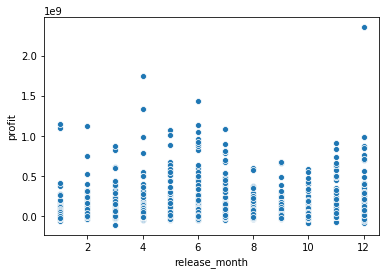

In [289]:
sns.scatterplot(x='release_month', y='profit', data= df_merged_movie)

Text(0, 0.5, 'worldwide_gross (in billion)')

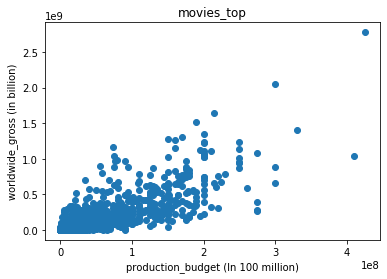

In [290]:
fig, ax = plt.subplots()

ax.scatter(df_merged_movie['production_budget'],df_merged_movie['worldwide_gross'])
ax.set_title('movies_top')
ax.set_xlabel('production_budget (In 100 million)')
ax.set_ylabel('worldwide_gross (in billion)')

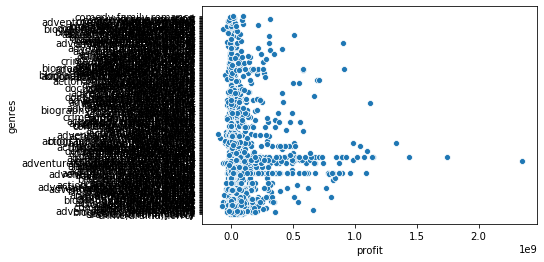

In [291]:
sns.scatterplot(x='profit', y='genres', data= df_merged_movie)

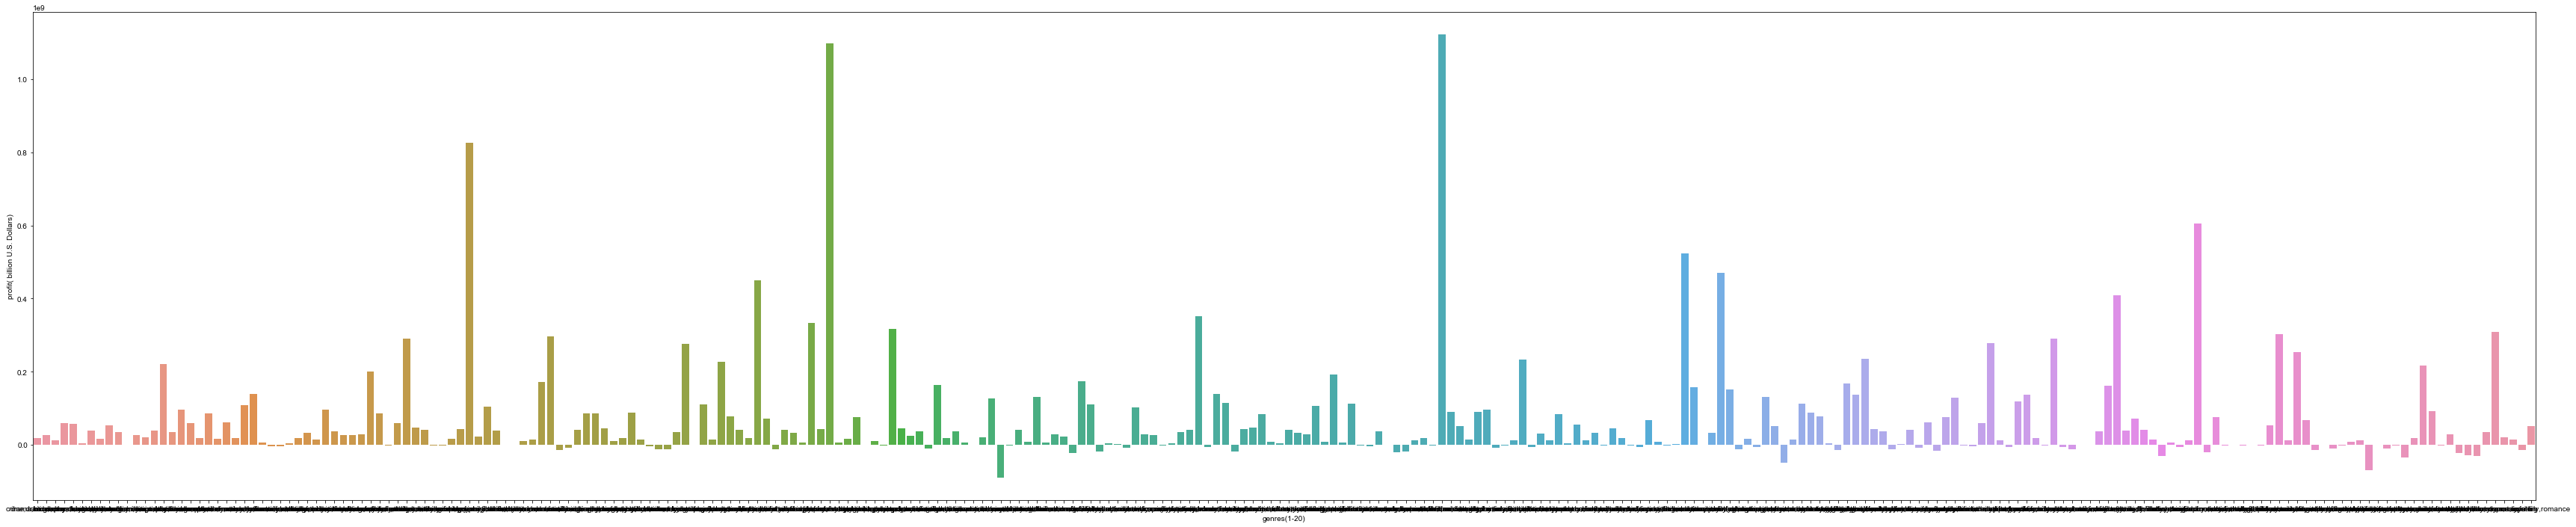

In [292]:
fig, ax = plt.subplots()
fig.set_size_inches(60,12)

ax = sns.barplot(x="genres", y="profit", ci=None, data=df_merged_movie)
ax.set(xlabel='genres(1-20)', ylabel='profit( billion U.S. Dollars)')
sns.set(style='darkgrid', font_scale=4)
plt.show()

In [87]:
'Action,Crime,Drama' . split()

['Action,Crime,Drama']

In [89]:
genres_split = df['genres'].str.split(',')

In [90]:
genres_split

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                         NaN
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

In [91]:
type(genres_split)

pandas.core.series.Series

In [93]:
genres_split[0]

['Action', 'Crime', 'Drama']

In [94]:
type(genres_split[0])

list

In [95]:
(genres_split[0][0])

'Action'

In [96]:
type(genres_split[0][0])

str

In [101]:
genres_split.str.get(0)

0              Action
1           Biography
2               Drama
3              Comedy
4              Comedy
             ...     
146139          Drama
146140    Documentary
146141         Comedy
146142            NaN
146143    Documentary
Name: genres, Length: 146144, dtype: object

In [102]:
genres_split.str.get(1)

0         Crime
1         Drama
2           NaN
3         Drama
4         Drama
          ...  
146139      NaN
146140      NaN
146141      NaN
146142      NaN
146143      NaN
Name: genres, Length: 146144, dtype: object

In [103]:
genres_split.str.get(2)

0           Drama
1             NaN
2             NaN
3             NaN
4         Fantasy
           ...   
146139        NaN
146140        NaN
146141        NaN
146142        NaN
146143        NaN
Name: genres, Length: 146144, dtype: object

In [132]:
df = pd.concat([genres_split.str.get(2),genres_split.str.get(1),genres_split.str.get(0)],ignore_index=True)

In [135]:
df.shape

(438432,)